In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [13]:

# Your code to import all the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Read and display dataset.

In [14]:
# Your code to read data
df=pd.read_csv('student_performances.csv')

# Your code to print first few samples of the dataset.
df.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory
5,M,16,U,LE3,T,4,3,services,other,reputation,...,yes,no,5,4,2,1,2,5,10,very good
6,M,16,U,LE3,T,2,2,other,other,home,...,yes,no,4,4,4,1,1,3,0,satisfactory
7,F,17,U,GT3,A,4,4,other,teacher,home,...,no,no,4,1,4,1,1,1,6,poor
8,M,15,U,LE3,A,3,2,services,other,home,...,yes,no,4,2,2,1,1,1,0,excellent
9,M,15,U,GT3,T,3,4,other,other,home,...,yes,no,5,5,1,1,1,5,0,very good


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [15]:
# Your code to print the key information about the datset. Use - .info method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

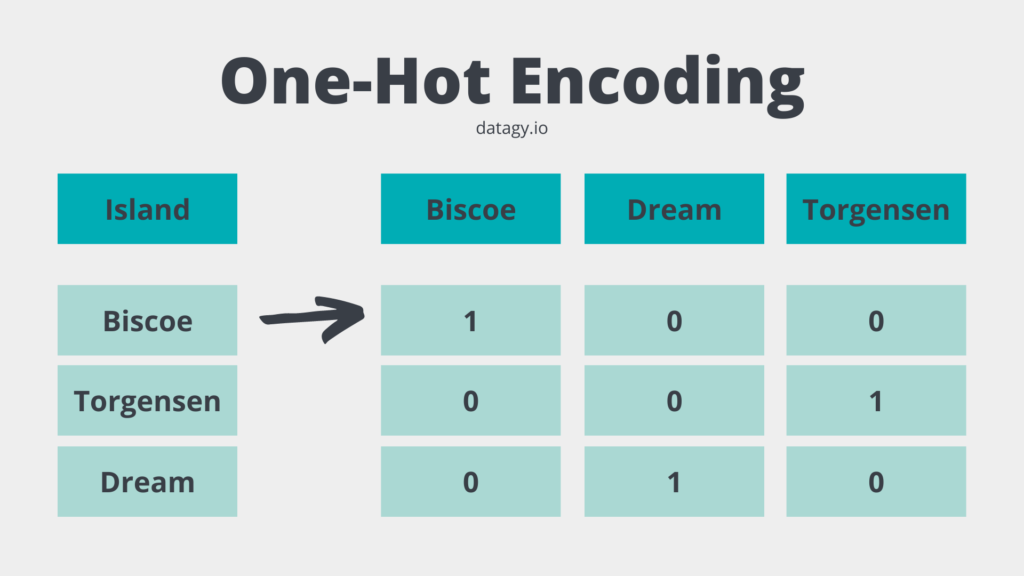

In [16]:
data = pd.get_dummies(df, columns = ['Fjob', 'Mjob', 'reason', 'guardian'],dtype=int)


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [17]:
# Your code to print first few rows of the data.
data.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


# Converting other text values in the dataframe to numbers using label encoding.

In [20]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])

#
## Your code to convert transform famsize to the numbers
#
labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])

#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])

#
## Your code to convert transform schoolsup to the numbers
#
labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])

#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])

#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])

#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])

#
## Your code to convert transform nursery to the numbers
#
labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])

#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])

#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])

#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])

# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [21]:
# Your code to print first few samples of the data.
data.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
5,1,16,1,1,1,4,3,1,2,0,...,0,1,0,0,0,0,1,0,1,0
6,1,16,1,1,1,2,2,1,2,0,...,1,0,0,0,1,0,0,0,1,0
7,0,17,1,0,0,4,4,2,2,0,...,1,0,0,0,1,0,0,0,1,0
8,1,15,1,1,0,3,2,1,2,0,...,0,1,0,0,1,0,0,0,1,0
9,1,15,1,0,1,3,4,1,2,0,...,1,0,0,0,1,0,0,0,1,0


In [24]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int32 
 1   age                395 non-null    int64 
 2   address            395 non-null    int32 
 3   famsize            395 non-null    int32 
 4   Pstatus            395 non-null    int32 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int32 
 11  famsup             395 non-null    int32 
 12  paid               395 non-null    int32 
 13  activities         395 non-null    int32 
 14  nursery            395 non-null    int32 
 15  higher             395 non-null    int32 
 16  internet           395 non-null    int32 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [25]:
X=[]
y=[]
# Your code to get X from data
X=data.drop('grades', axis=1).values
# Your code to get y from data
y=data['grades']

# Print shapes of X and y to make sure everything is good

In [26]:
# Print shape of X
print("shape of X",X.shape)
# Print shape of y
print("Shape of y",y.shape)
# Print X
print("X=",X)
# Print y
print("y=",y)

shape of X (395, 42)
Shape of y (395,)
X= [[ 0 18  1 ...  0  1  0]
 [ 0 17  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 ...
 [ 1 21  0 ...  0  0  1]
 [ 1 18  0 ...  0  1  0]
 [ 1 19  1 ...  1  0  0]]
y= 0              poor
1              poor
2      satisfactory
3         very good
4      satisfactory
           ...     
390            poor
391       excellent
392            poor
393    satisfactory
394            poor
Name: grades, Length: 395, dtype: object


# Next  - Split data into train and test set.

In [27]:
# Your code to split data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
#
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(118, 42)
(277, 42)
(118,)
(277,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [30]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [32]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
precision_score_SVM= precision_score(y_test, y_pred, average = 'micro' )
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
recall_score_SVM=recall_score(y_test, y_pred, average = 'micro' )
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))
f1_score_SVM=f1_score(y_test, y_pred, average = 'micro' )
print (classification_report(y_test, y_pred))

Accuracy test set:  0.26714801444043323
None
Precision test set:  0.26714801444043323
None
Recall test set:  0.26714801444043323
None
F-score test set:  0.26714801444043323
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        28
        good       0.00      0.00      0.00        47
        poor       0.30      0.61      0.41        93
satisfactory       0.19      0.24      0.21        72
   very good       0.00      0.00      0.00        37

    accuracy                           0.27       277
   macro avg       0.10      0.17      0.12       277
weighted avg       0.15      0.27      0.19       277



C:\Users\Vimal Thampi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vimal Thampi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vimal Thampi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [33]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.3644067796610169
None
Precision train set:  0.3644067796610169
None
Recall train set:  0.3644067796610169
None
F-score train set:  0.3644067796610169
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        12
        good       0.00      0.00      0.00        15
        poor       0.33      0.73      0.45        37
satisfactory       0.46      0.52      0.48        31
   very good       0.00      0.00      0.00        23

    accuracy                           0.36       118
   macro avg       0.16      0.25      0.19       118
weighted avg       0.22      0.36      0.27       118



C:\Users\Vimal Thampi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vimal Thampi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vimal Thampi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

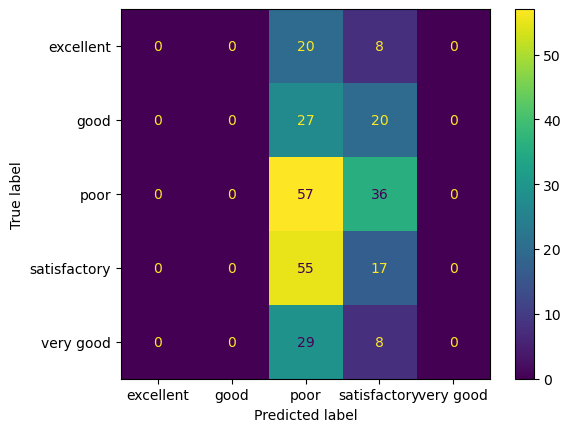

In [34]:
#
# Your code to display confusion matrix between predicted output and actual output
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()


# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

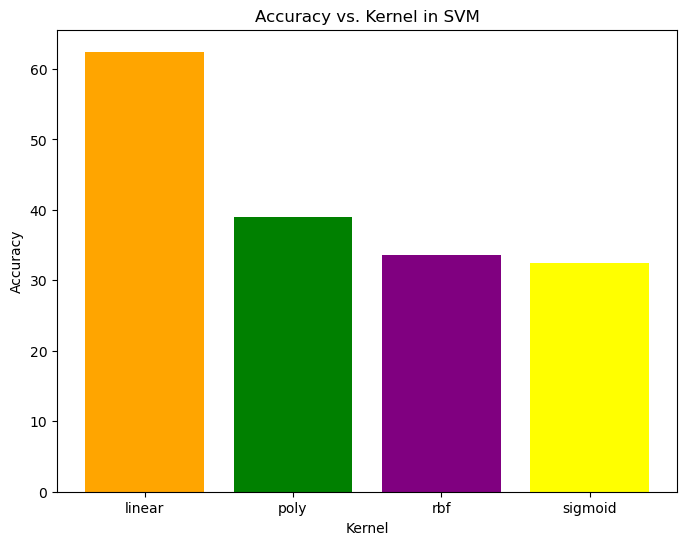

In [38]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
kernels=['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy
accuracy=[]
for kernel in kernels:
    classifier = SVC(kernel = kernel)
    classifier.fit(X_test, y_test)
    y_predNew = classifier.predict(X_test)
    accuracy.append((accuracy_score(y_test, y_predNew)*100))
  #
  #
  # Your code to compare the classifier for different Kernesls
  #
  #
#
# Your code to plot accuracy vs kernels
#


plt.figure(figsize=(8, 6))
plt.bar(x=kernels,height=accuracy,color=['Orange','green','purple','yellow'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel in SVM')
plt.show()

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [39]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
test_predNew=knn.predict(X_test)
acc_test=accuracy_score(y_test,test_predNew)
knn_score=acc_test

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [40]:
#
#
# Your code to evaluate the classifer on test data
y_pred = knn.predict(X_test)
print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
precision_score_knn= precision_score(y_test, y_pred, average = 'micro' )
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
recall_score_knn=recall_score(y_test, y_pred, average = 'micro' )
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))
f1_score_knn=f1_score(y_test, y_pred, average = 'micro' )

print (classification_report(y_test, y_pred))

Accuracy test set:  0.2815884476534296
None
Precision test set:  0.2815884476534296
None
Recall test set:  0.2815884476534296
None
F-score test set:  0.2815884476534296
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        28
        good       0.21      0.19      0.20        47
        poor       0.41      0.52      0.46        93
satisfactory       0.21      0.21      0.21        72
   very good       0.18      0.16      0.17        37

    accuracy                           0.28       277
   macro avg       0.20      0.22      0.21       277
weighted avg       0.25      0.28      0.27       277



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [41]:
#
#
# Your code to evaluate the classifer on train data
y_pred = knn.predict(X_train)

print (print("Accuracy test set: ", accuracy_score(y_train, y_pred)))

print (print("Precision test set: ", precision_score(y_train, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_train, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_train, y_pred, average = 'micro' )))

print (classification_report(y_train, y_pred))

Accuracy test set:  0.5677966101694916
None
Precision test set:  0.5677966101694916
None
Recall test set:  0.5677966101694916
None
F-score test set:  0.5677966101694916
None
              precision    recall  f1-score   support

   excellent       0.44      0.33      0.38        12
        good       0.44      0.47      0.45        15
        poor       0.67      0.76      0.71        37
satisfactory       0.53      0.65      0.58        31
   very good       0.62      0.35      0.44        23

    accuracy                           0.57       118
   macro avg       0.54      0.51      0.51       118
weighted avg       0.57      0.57      0.56       118



# Display confusion matric between predicted and actual values.

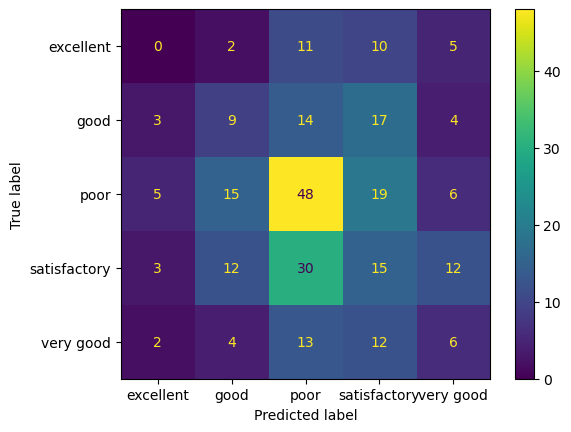

In [42]:
#
#
# Your code to display confusion matrix
cm = confusion_matrix(y_test, test_predNew)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Develop Logistic Regression-based classifier.

In [60]:
#
# Your code to develop logistic regression-based classifier
clf = LogisticRegression(solver='liblinear').fit(X_test, y_test)
log_pred=clf.predict(X_test)
log_score=clf.score(X_test, y_test)

# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(X_test, y_test)
log_pred=clf.predict(X_test)
log_score=clf.score(X_test, y_test)
log_score*=100

In [46]:
#
#
#
# Your code to evaluate the logistic regression classifier on test data
clf = LogisticRegression(solver='liblinear').fit(X_test, y_test)
log_pred=clf.predict(X_test)
log_score=clf.score(X_test, y_test)

# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [47]:
#
#
#
# Your code to evaluate the logistic regression classifier on train data
y_pred = clf.predict(X_test)
print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
precision_score_clf= precision_score(y_test, y_pred, average = 'micro' )
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
recall_score_clf=recall_score(y_test, y_pred, average = 'micro' )
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))
f1_score_clf=f1_score(y_test, y_pred, average = 'micro' )

print (classification_report(y_test, y_pred))

Accuracy test set:  0.5667870036101083
None
Precision test set:  0.5667870036101083
None
Recall test set:  0.5667870036101083
None
F-score test set:  0.5667870036101083
None
              precision    recall  f1-score   support

   excellent       0.65      0.61      0.63        28
        good       0.48      0.26      0.33        47
        poor       0.60      0.77      0.68        93
satisfactory       0.50      0.53      0.51        72
   very good       0.60      0.49      0.54        37

    accuracy                           0.57       277
   macro avg       0.57      0.53      0.54       277
weighted avg       0.56      0.57      0.55       277



# Display confusion matrix between predicted and actual values for logistic regression.

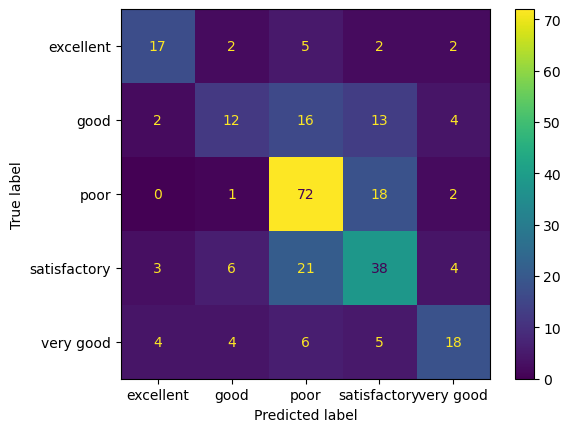

In [48]:
#
# Your code to display confusion matrix for logistic regression
cm = confusion_matrix(y_test, log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

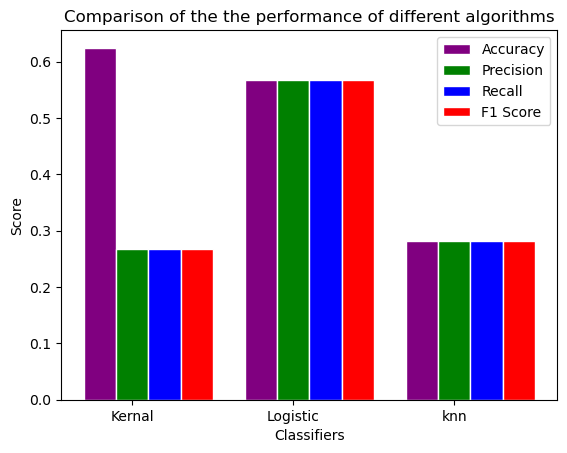

In [59]:
#
#
# Your code to plot and compare the performance of different algorithms
classifiers = ['Kernal','Logistic','knn']
acc_values=[accuracy[0]/100,log_score,knn_score]
precision_scores=[precision_score_SVM,precision_score_clf,precision_score_knn]
recall_scores=[recall_score_SVM,recall_score_clf,recall_score_knn]
f_scores=[f1_score_SVM,f1_score_clf,f1_score_knn]
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
plt.bar(r1, acc_values, color='Purple', width=bar_width, edgecolor='White', label='Accuracy')
plt.bar(r2, precision_scores, color='green', width=bar_width, edgecolor='White', label='Precision')
plt.bar(r3, recall_scores, color='Blue', width=bar_width, edgecolor='White', label='Recall')
plt.bar(r4, f_scores, color='red', width=bar_width, edgecolor='White', label='F1 Score')
plt.xlabel('Classifiers')
plt.xticks([r + bar_width for r in range(len(classifiers))], classifiers)
plt.ylabel('Score')
plt.title('Comparison of the the performance of different algorithms')
plt.legend()


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

